In [1]:
import numpy  
import pandas 
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
dataframe = pandas.read_csv("./forestfires.csv.xls")

In [3]:
dataframe.shape

(517, 13)

In [4]:
dataframe.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [5]:
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), 
                        inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [6]:
dataframe.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
dataframe.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [8]:
dataframe.isnull().sum()  

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [9]:
dataframe.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [10]:
dataframe.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [11]:
dataframe.corr() 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


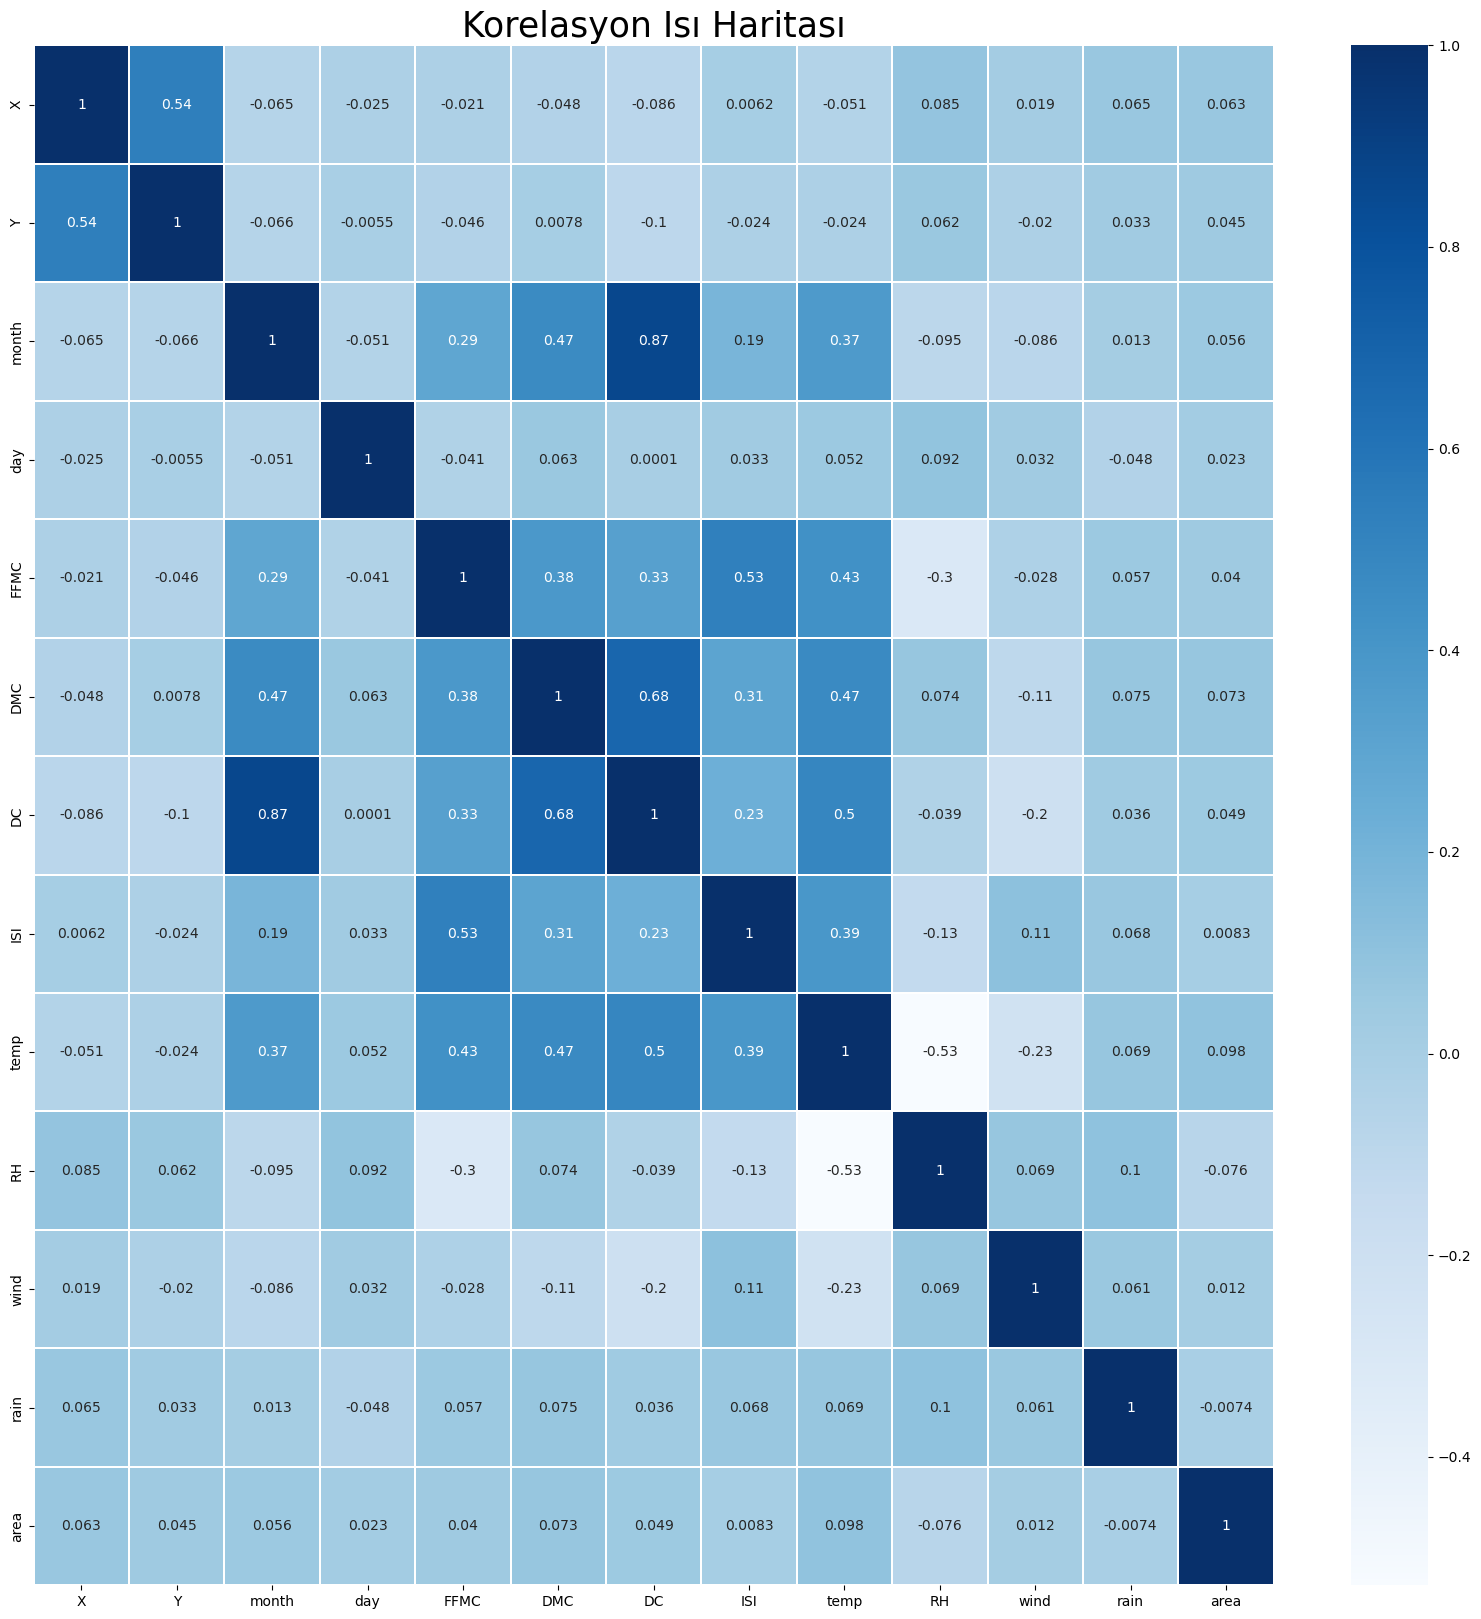

In [12]:
plt.figure(figsize=(20,20));    
sns.heatmap(dataframe.corr(),annot=True,cmap='Blues',linewidth=0.01); 
plt.title('Korelasyon Isı Haritası',fontsize=25,fontweight=5);  



In [13]:
dataframe.max () 

X           9.00
Y           9.00
month      12.00
day         7.00
FFMC       96.20
DMC       291.30
DC        860.60
ISI        56.10
temp       33.30
RH        100.00
wind        9.40
rain        6.40
area     1090.84
dtype: float64

In [14]:
dataframe.min()

X         1.0
Y         2.0
month     1.0
day       1.0
FFMC     18.7
DMC       1.1
DC        7.9
ISI       0.0
temp      2.2
RH       15.0
wind      0.4
rain      0.0
area      0.0
dtype: float64

In [15]:
dataset = dataframe.values


X = dataset[:,0:12]
Y = dataset[:,12]

In [16]:
X = dataframe.drop(['area'],axis=1)
y=dataframe['area']

In [18]:
scaler = MinMaxScaler()

In [34]:
import time
time.gmtime(time.time())

time.struct_time(tm_year=2023, tm_mon=1, tm_mday=4, tm_hour=18, tm_min=34, tm_sec=38, tm_wday=2, tm_yday=4, tm_isdst=0)

In [19]:
normalized_x_train = pandas.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

In [20]:
normalized_x_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.125,0.428571,0.545455,1.000000,0.949782,0.581711,0.476634,0.213645,0.686084,0.2875,0.635294,0.0
1,0.125,0.000000,0.090909,0.833333,0.635371,0.004172,0.008733,0.025135,0.077670,0.5250,0.000000,0.0
2,0.750,0.428571,0.727273,0.166667,0.886463,0.441933,0.808001,0.118492,0.598706,0.2500,0.152941,0.0
3,0.375,0.142857,0.727273,0.166667,0.906114,0.380042,0.899693,0.109515,0.443366,0.4500,0.152941,0.0
4,0.125,0.285714,0.727273,0.000000,0.899563,0.368567,0.892259,0.104129,0.588997,0.3000,0.105882,0.0


In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=1)

In [21]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

NameError: name 'pd' is not defined

In [ ]:
model = DecisionTreeRegressor()
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=3)
fit = rfe.fit(X_train, y_train)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

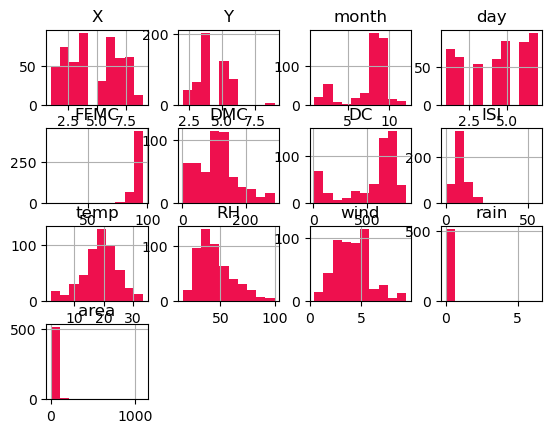

In [22]:
dataframe.hist(color='#ee104e', histtype="bar")

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

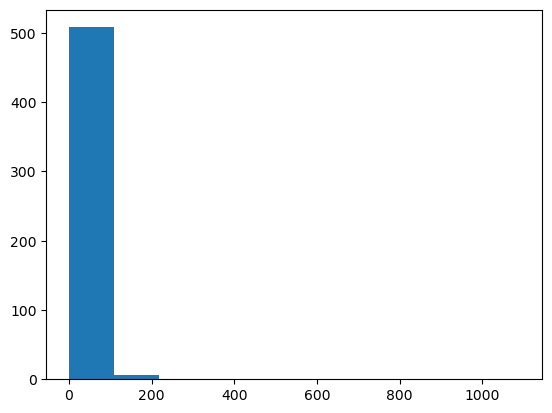

In [23]:
plt.hist((dataframe.area ))

X           AxesSubplot(0.125,0.712609;0.168478x0.167391)
Y        AxesSubplot(0.327174,0.712609;0.168478x0.167391)
month    AxesSubplot(0.529348,0.712609;0.168478x0.167391)
day      AxesSubplot(0.731522,0.712609;0.168478x0.167391)
FFMC        AxesSubplot(0.125,0.511739;0.168478x0.167391)
DMC      AxesSubplot(0.327174,0.511739;0.168478x0.167391)
DC       AxesSubplot(0.529348,0.511739;0.168478x0.167391)
ISI      AxesSubplot(0.731522,0.511739;0.168478x0.167391)
temp         AxesSubplot(0.125,0.31087;0.168478x0.167391)
RH        AxesSubplot(0.327174,0.31087;0.168478x0.167391)
wind      AxesSubplot(0.529348,0.31087;0.168478x0.167391)
rain      AxesSubplot(0.731522,0.31087;0.168478x0.167391)
area            AxesSubplot(0.125,0.11;0.168478x0.167391)
dtype: object

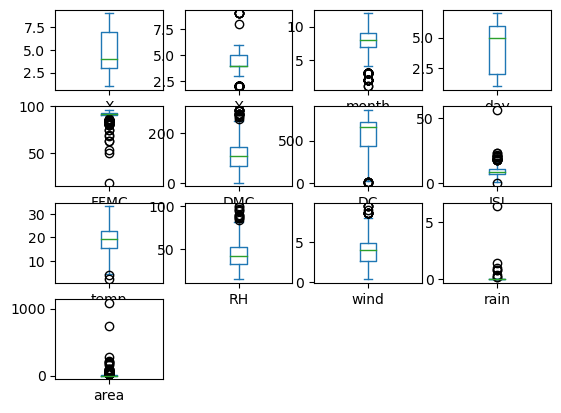

In [24]:
dataframe.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

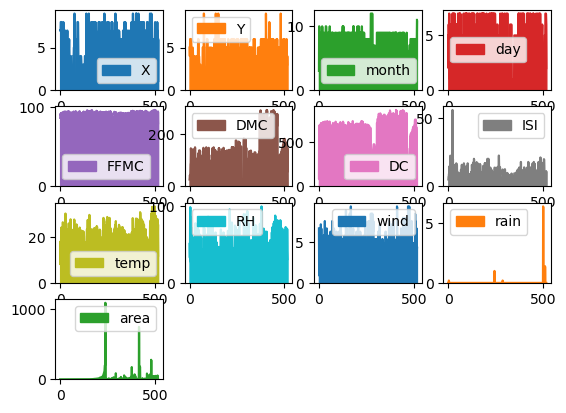

In [25]:
dataframe.plot(kind='area',  layout=(4,4), subplots=True, sharex=False, sharey=False)

array([[<AxesSubplot:xlabel='X', ylabel='X'>,
        <AxesSubplot:xlabel='Y', ylabel='X'>,
        <AxesSubplot:xlabel='month', ylabel='X'>,
        <AxesSubplot:xlabel='day', ylabel='X'>,
        <AxesSubplot:xlabel='FFMC', ylabel='X'>,
        <AxesSubplot:xlabel='DMC', ylabel='X'>,
        <AxesSubplot:xlabel='DC', ylabel='X'>,
        <AxesSubplot:xlabel='ISI', ylabel='X'>,
        <AxesSubplot:xlabel='temp', ylabel='X'>,
        <AxesSubplot:xlabel='RH', ylabel='X'>,
        <AxesSubplot:xlabel='wind', ylabel='X'>,
        <AxesSubplot:xlabel='rain', ylabel='X'>,
        <AxesSubplot:xlabel='area', ylabel='X'>],
       [<AxesSubplot:xlabel='X', ylabel='Y'>,
        <AxesSubplot:xlabel='Y', ylabel='Y'>,
        <AxesSubplot:xlabel='month', ylabel='Y'>,
        <AxesSubplot:xlabel='day', ylabel='Y'>,
        <AxesSubplot:xlabel='FFMC', ylabel='Y'>,
        <AxesSubplot:xlabel='DMC', ylabel='Y'>,
        <AxesSubplot:xlabel='DC', ylabel='Y'>,
        <AxesSubplot:xlabel='ISI', ylabe

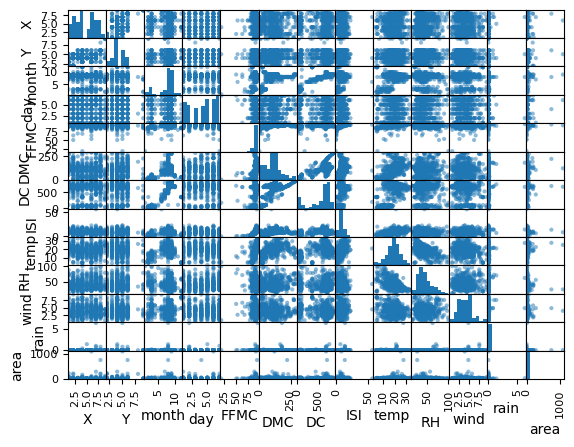

In [26]:
scatter_matrix(dataframe)

In [27]:
num_instances = len(X)

models = []
models.append(('CART', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('LiR', LinearRegression()))



results = []
names = []
scoring = []

for name, model in models:
   
    model.fit(X_test, y_test)
    
    y_predictions = model.predict(X_test)
    
 
    score = explained_variance_score(y_predictions,y_test)
   
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f " % (name, score)
    print(msg)

NameError: name 'explained_variance_score' is not defined